In [1]:
import os
import random
from functools import partial
from typing import List

import torch
import torch.nn as nn

import numpy as np
import albumentations as A

In [2]:
from torch.utils.data import DataLoader
from dataset import make_dataset
from setseed import set_seed

BATCH_SIZE = 32
RANDOM_SEED = 21
preprocess = None
augmentation = None
set_seed(RANDOM_SEED)

train_dataset = make_dataset(mode = 'train', RANDOM_SEED = RANDOM_SEED, preprocess = preprocess, augmentation=augmentation)
valid_dataset = make_dataset(mode = 'valid', RANDOM_SEED = RANDOM_SEED, preprocess = preprocess)
#test_dataset = make_dataset(mode = 'test', RANDOM_SEED = RANDOM_SEED, preprocess = preprocess)

train_loader = DataLoader(
    dataset=train_dataset, 
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=6,
    drop_last=True,
)

valid_loader = DataLoader(
    dataset=valid_dataset, 
    batch_size=2,
    shuffle=False,
    num_workers=2,
    drop_last=False
)

In [3]:
import segmentation_models_pytorch as smp

set_seed(RANDOM_SEED)

model = smp.UnetPlusPlus(
    encoder_name="tu-mobilenetv3_large_100",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=3,                      # model output channels (number of classes in your dataset)
)
model.name = 'Unet++_mobilenetv3_large_100'

#model = torch.load('/opt/ml/input/code/trained_model/best.pt')

In [4]:
LR = 1e-4
epoch = 11
VAL_EVERY = 1 # validation 주기

In [5]:
import torch.optim as optim

set_seed(RANDOM_SEED)

optimizer = optim.Adam(params=model.parameters(), lr=LR, weight_decay=1e-6)

In [6]:
from loss import FocalLoss, DiceLoss, FocalTverskyLoss

set_seed(RANDOM_SEED)

#criterion = nn.BCEWithLogitsLoss()
#criterion = nn.SmoothL1Loss()
#criterion = [(nn.BCEWithLogitsLoss(), 0.75), (DiceLoss(), 0.25)]
#criterion = [(nn.BCEWithLogitsLoss(), 0.5), (nn.SmoothL1Loss(), 0.5)]
criterion = [(nn.BCEWithLogitsLoss(), 0.5), (FocalTverskyLoss(alpha = 0.7, beta = 0.3, gamma = 2), 0.5)]

In [7]:
from train import train

set_seed(RANDOM_SEED)

#07.12 11시쯤 누적 17epoch

train(model, train_loader, valid_loader, criterion, optimizer, epoch, VAL_EVERY)

Start training..
result model will be saved in /opt/ml/input/code/trained_model/
2023-07-13 05:33:12 | Epoch [1/11], Step [0/3493]
2023-07-13 05:34:31 | Epoch [1/11], Step [100/3493], Loss: 0.603
2023-07-13 05:35:46 | Epoch [1/11], Step [200/3493], Loss: 0.4727
2023-07-13 05:37:00 | Epoch [1/11], Step [300/3493], Loss: 0.3537
2023-07-13 05:38:15 | Epoch [1/11], Step [400/3493], Loss: 0.2233
2023-07-13 05:39:30 | Epoch [1/11], Step [500/3493], Loss: 0.1365
2023-07-13 05:40:44 | Epoch [1/11], Step [600/3493], Loss: 0.0911
2023-07-13 05:41:59 | Epoch [1/11], Step [700/3493], Loss: 0.0633
2023-07-13 05:43:14 | Epoch [1/11], Step [800/3493], Loss: 0.0475
2023-07-13 05:44:28 | Epoch [1/11], Step [900/3493], Loss: 0.0386
2023-07-13 05:45:43 | Epoch [1/11], Step [1000/3493], Loss: 0.0305
2023-07-13 05:46:58 | Epoch [1/11], Step [1100/3493], Loss: 0.0271
2023-07-13 05:48:12 | Epoch [1/11], Step [1200/3493], Loss: 0.0246
2023-07-13 05:49:27 | Epoch [1/11], Step [1300/3493], Loss: 0.0208
2023-07-

  0%|          | 0/14957 [00:00<?, ?it/s]

sclera      : 0.8402
iris        : 0.9368
pupil       : 0.9109
Best performance at epoch: 1, 0.0000 -> 0.8960
Save model in /opt/ml/input/code/trained_model/last_model
2023-07-13 06:27:15 | Epoch [2/11], Step [0/3493]
2023-07-13 06:28:30 | Epoch [2/11], Step [100/3493], Loss: 0.0093
2023-07-13 06:29:45 | Epoch [2/11], Step [200/3493], Loss: 0.0109
2023-07-13 06:31:00 | Epoch [2/11], Step [300/3493], Loss: 0.0091
2023-07-13 06:32:14 | Epoch [2/11], Step [400/3493], Loss: 0.0087
2023-07-13 06:33:29 | Epoch [2/11], Step [500/3493], Loss: 0.0088
2023-07-13 06:34:44 | Epoch [2/11], Step [600/3493], Loss: 0.0096
2023-07-13 06:35:59 | Epoch [2/11], Step [700/3493], Loss: 0.0089
2023-07-13 06:37:14 | Epoch [2/11], Step [800/3493], Loss: 0.0099
2023-07-13 06:38:28 | Epoch [2/11], Step [900/3493], Loss: 0.0093
2023-07-13 06:39:43 | Epoch [2/11], Step [1000/3493], Loss: 0.0084
2023-07-13 06:40:58 | Epoch [2/11], Step [1100/3493], Loss: 0.0092
2023-07-13 06:42:13 | Epoch [2/11], Step [1200/3493], 

  0%|          | 0/14957 [00:00<?, ?it/s]

sclera      : 0.8460
iris        : 0.9390
pupil       : 0.9159
Best performance at epoch: 2, 0.8960 -> 0.9003
Save model in /opt/ml/input/code/trained_model/last_model
2023-07-13 07:22:23 | Epoch [3/11], Step [0/3493]
2023-07-13 07:23:38 | Epoch [3/11], Step [100/3493], Loss: 0.007
2023-07-13 07:24:52 | Epoch [3/11], Step [200/3493], Loss: 0.0088
2023-07-13 07:26:07 | Epoch [3/11], Step [300/3493], Loss: 0.0072
2023-07-13 07:27:22 | Epoch [3/11], Step [400/3493], Loss: 0.007
2023-07-13 07:28:37 | Epoch [3/11], Step [500/3493], Loss: 0.0069
2023-07-13 07:29:51 | Epoch [3/11], Step [600/3493], Loss: 0.0072
2023-07-13 07:31:06 | Epoch [3/11], Step [700/3493], Loss: 0.0071
2023-07-13 07:32:21 | Epoch [3/11], Step [800/3493], Loss: 0.0083
2023-07-13 07:33:36 | Epoch [3/11], Step [900/3493], Loss: 0.0075
2023-07-13 07:34:50 | Epoch [3/11], Step [1000/3493], Loss: 0.0071
2023-07-13 07:36:05 | Epoch [3/11], Step [1100/3493], Loss: 0.0076
2023-07-13 07:37:20 | Epoch [3/11], Step [1200/3493], Lo

  0%|          | 0/14957 [00:00<?, ?it/s]

sclera      : 0.8501
iris        : 0.9398
pupil       : 0.9176
Best performance at epoch: 3, 0.9003 -> 0.9025
Save model in /opt/ml/input/code/trained_model/last_model
2023-07-13 08:17:41 | Epoch [4/11], Step [0/3493]
2023-07-13 08:18:56 | Epoch [4/11], Step [100/3493], Loss: 0.0063
2023-07-13 08:20:11 | Epoch [4/11], Step [200/3493], Loss: 0.008
2023-07-13 08:21:25 | Epoch [4/11], Step [300/3493], Loss: 0.0066
2023-07-13 08:22:40 | Epoch [4/11], Step [400/3493], Loss: 0.0063
2023-07-13 08:23:55 | Epoch [4/11], Step [500/3493], Loss: 0.0063
2023-07-13 08:25:10 | Epoch [4/11], Step [600/3493], Loss: 0.0065
2023-07-13 08:26:24 | Epoch [4/11], Step [700/3493], Loss: 0.0065
2023-07-13 08:27:39 | Epoch [4/11], Step [800/3493], Loss: 0.0075
2023-07-13 08:28:54 | Epoch [4/11], Step [900/3493], Loss: 0.0069
2023-07-13 08:30:09 | Epoch [4/11], Step [1000/3493], Loss: 0.0065
2023-07-13 08:31:23 | Epoch [4/11], Step [1100/3493], Loss: 0.0068
2023-07-13 08:32:38 | Epoch [4/11], Step [1200/3493], L

  0%|          | 0/14957 [00:00<?, ?it/s]

sclera      : 0.8519
iris        : 0.9404
pupil       : 0.9175
Best performance at epoch: 4, 0.9025 -> 0.9033
Save model in /opt/ml/input/code/trained_model/last_model
2023-07-13 09:13:33 | Epoch [5/11], Step [0/3493]
2023-07-13 09:14:48 | Epoch [5/11], Step [100/3493], Loss: 0.0059
2023-07-13 09:16:03 | Epoch [5/11], Step [200/3493], Loss: 0.0074
2023-07-13 09:17:18 | Epoch [5/11], Step [300/3493], Loss: 0.0062
2023-07-13 09:18:32 | Epoch [5/11], Step [400/3493], Loss: 0.0058
2023-07-13 09:19:47 | Epoch [5/11], Step [500/3493], Loss: 0.0058
2023-07-13 09:21:02 | Epoch [5/11], Step [600/3493], Loss: 0.006
2023-07-13 09:22:17 | Epoch [5/11], Step [700/3493], Loss: 0.0061
2023-07-13 09:23:31 | Epoch [5/11], Step [800/3493], Loss: 0.007
2023-07-13 09:24:46 | Epoch [5/11], Step [900/3493], Loss: 0.0064
2023-07-13 09:26:01 | Epoch [5/11], Step [1000/3493], Loss: 0.0062
2023-07-13 09:27:15 | Epoch [5/11], Step [1100/3493], Loss: 0.0063
2023-07-13 09:28:30 | Epoch [5/11], Step [1200/3493], Lo

  0%|          | 0/14957 [00:00<?, ?it/s]

sclera      : 0.8524
iris        : 0.9407
pupil       : 0.9188
Best performance at epoch: 5, 0.9033 -> 0.9039
Save model in /opt/ml/input/code/trained_model/last_model
2023-07-13 10:08:49 | Epoch [6/11], Step [0/3493]
2023-07-13 10:10:04 | Epoch [6/11], Step [100/3493], Loss: 0.0056
2023-07-13 10:11:18 | Epoch [6/11], Step [200/3493], Loss: 0.0068
2023-07-13 10:12:33 | Epoch [6/11], Step [300/3493], Loss: 0.0059
2023-07-13 10:13:48 | Epoch [6/11], Step [400/3493], Loss: 0.0055
2023-07-13 10:15:03 | Epoch [6/11], Step [500/3493], Loss: 0.0056
2023-07-13 10:16:18 | Epoch [6/11], Step [600/3493], Loss: 0.0057
2023-07-13 10:17:32 | Epoch [6/11], Step [700/3493], Loss: 0.0058
2023-07-13 10:18:47 | Epoch [6/11], Step [800/3493], Loss: 0.0065
2023-07-13 10:20:02 | Epoch [6/11], Step [900/3493], Loss: 0.0061
2023-07-13 10:21:16 | Epoch [6/11], Step [1000/3493], Loss: 0.006
2023-07-13 10:22:31 | Epoch [6/11], Step [1100/3493], Loss: 0.0059
2023-07-13 10:23:46 | Epoch [6/11], Step [1200/3493], L

  0%|          | 0/14957 [00:00<?, ?it/s]

sclera      : 0.8520
iris        : 0.9409
pupil       : 0.9207
Best performance at epoch: 6, 0.9039 -> 0.9045
Save model in /opt/ml/input/code/trained_model/last_model
2023-07-13 11:02:21 | Epoch [7/11], Step [0/3493]
2023-07-13 11:03:36 | Epoch [7/11], Step [100/3493], Loss: 0.0053
2023-07-13 11:04:51 | Epoch [7/11], Step [200/3493], Loss: 0.0064
2023-07-13 11:06:06 | Epoch [7/11], Step [300/3493], Loss: 0.0056
2023-07-13 11:07:20 | Epoch [7/11], Step [400/3493], Loss: 0.0053
2023-07-13 11:08:35 | Epoch [7/11], Step [500/3493], Loss: 0.0054
2023-07-13 11:09:50 | Epoch [7/11], Step [600/3493], Loss: 0.0055
2023-07-13 11:11:04 | Epoch [7/11], Step [700/3493], Loss: 0.0055
2023-07-13 11:12:19 | Epoch [7/11], Step [800/3493], Loss: 0.0061
2023-07-13 11:13:34 | Epoch [7/11], Step [900/3493], Loss: 0.006
2023-07-13 11:14:49 | Epoch [7/11], Step [1000/3493], Loss: 0.0056
2023-07-13 11:16:04 | Epoch [7/11], Step [1100/3493], Loss: 0.0057
2023-07-13 11:17:18 | Epoch [7/11], Step [1200/3493], L

  0%|          | 0/14957 [00:00<?, ?it/s]

sclera      : 0.8514
iris        : 0.9412
pupil       : 0.9205
No update
Best performance was at epoch: 6, 0.9045
2023-07-13 11:57:38 | Epoch [8/11], Step [0/3493]
2023-07-13 11:58:53 | Epoch [8/11], Step [100/3493], Loss: 0.0052
2023-07-13 12:00:08 | Epoch [8/11], Step [200/3493], Loss: 0.0062
2023-07-13 12:01:23 | Epoch [8/11], Step [300/3493], Loss: 0.0055
2023-07-13 12:02:38 | Epoch [8/11], Step [400/3493], Loss: 0.0051
2023-07-13 12:03:52 | Epoch [8/11], Step [500/3493], Loss: 0.0052
2023-07-13 12:05:07 | Epoch [8/11], Step [600/3493], Loss: 0.0053
2023-07-13 12:06:22 | Epoch [8/11], Step [700/3493], Loss: 0.0053
2023-07-13 12:07:36 | Epoch [8/11], Step [800/3493], Loss: 0.0059
2023-07-13 12:08:51 | Epoch [8/11], Step [900/3493], Loss: 0.0058
2023-07-13 12:10:06 | Epoch [8/11], Step [1000/3493], Loss: 0.0055
2023-07-13 12:11:20 | Epoch [8/11], Step [1100/3493], Loss: 0.0054
2023-07-13 12:12:35 | Epoch [8/11], Step [1200/3493], Loss: 0.0052
2023-07-13 12:13:50 | Epoch [8/11], Step 

  0%|          | 0/14957 [00:00<?, ?it/s]

sclera      : 0.8513
iris        : 0.9413
pupil       : 0.9215
Best performance at epoch: 8, 0.9045 -> 0.9047
Save model in /opt/ml/input/code/trained_model/last_model
2023-07-13 12:53:23 | Epoch [9/11], Step [0/3493]
2023-07-13 12:54:38 | Epoch [9/11], Step [100/3493], Loss: 0.0051
2023-07-13 12:55:53 | Epoch [9/11], Step [200/3493], Loss: 0.0062
2023-07-13 12:57:08 | Epoch [9/11], Step [300/3493], Loss: 0.0053
2023-07-13 12:58:23 | Epoch [9/11], Step [400/3493], Loss: 0.0051
2023-07-13 12:59:37 | Epoch [9/11], Step [500/3493], Loss: 0.0051
2023-07-13 13:00:52 | Epoch [9/11], Step [600/3493], Loss: 0.0052
2023-07-13 13:02:07 | Epoch [9/11], Step [700/3493], Loss: 0.0051
2023-07-13 13:03:22 | Epoch [9/11], Step [800/3493], Loss: 0.0056
2023-07-13 13:04:36 | Epoch [9/11], Step [900/3493], Loss: 0.0056
2023-07-13 13:05:51 | Epoch [9/11], Step [1000/3493], Loss: 0.0054
2023-07-13 13:07:06 | Epoch [9/11], Step [1100/3493], Loss: 0.0053
2023-07-13 13:08:21 | Epoch [9/11], Step [1200/3493], 

  0%|          | 0/14957 [00:00<?, ?it/s]

sclera      : 0.8507
iris        : 0.9417
pupil       : 0.9229
Best performance at epoch: 9, 0.9047 -> 0.9051
Save model in /opt/ml/input/code/trained_model/last_model
2023-07-13 13:48:08 | Epoch [10/11], Step [0/3493]
2023-07-13 13:49:23 | Epoch [10/11], Step [100/3493], Loss: 0.0052
2023-07-13 13:50:38 | Epoch [10/11], Step [200/3493], Loss: 0.0061
2023-07-13 13:51:52 | Epoch [10/11], Step [300/3493], Loss: 0.0051
2023-07-13 13:53:07 | Epoch [10/11], Step [400/3493], Loss: 0.005
2023-07-13 13:54:22 | Epoch [10/11], Step [500/3493], Loss: 0.0049
2023-07-13 13:55:36 | Epoch [10/11], Step [600/3493], Loss: 0.0051
2023-07-13 13:56:51 | Epoch [10/11], Step [700/3493], Loss: 0.005
2023-07-13 13:58:06 | Epoch [10/11], Step [800/3493], Loss: 0.0054
2023-07-13 13:59:21 | Epoch [10/11], Step [900/3493], Loss: 0.0056
2023-07-13 14:00:36 | Epoch [10/11], Step [1000/3493], Loss: 0.0052
2023-07-13 14:01:51 | Epoch [10/11], Step [1100/3493], Loss: 0.0052
2023-07-13 14:03:05 | Epoch [10/11], Step [1

  0%|          | 0/14957 [00:00<?, ?it/s]

sclera      : 0.8508
iris        : 0.9415
pupil       : 0.9239
Best performance at epoch: 10, 0.9051 -> 0.9054
Save model in /opt/ml/input/code/trained_model/last_model
2023-07-13 14:43:43 | Epoch [11/11], Step [0/3493]
2023-07-13 14:44:59 | Epoch [11/11], Step [100/3493], Loss: 0.0052
2023-07-13 14:46:13 | Epoch [11/11], Step [200/3493], Loss: 0.0058
2023-07-13 14:47:28 | Epoch [11/11], Step [300/3493], Loss: 0.0049
2023-07-13 14:48:43 | Epoch [11/11], Step [400/3493], Loss: 0.0048
2023-07-13 14:49:58 | Epoch [11/11], Step [500/3493], Loss: 0.0048
2023-07-13 14:51:13 | Epoch [11/11], Step [600/3493], Loss: 0.005
2023-07-13 14:52:27 | Epoch [11/11], Step [700/3493], Loss: 0.005
2023-07-13 14:53:42 | Epoch [11/11], Step [800/3493], Loss: 0.0052
2023-07-13 14:54:57 | Epoch [11/11], Step [900/3493], Loss: 0.0054
2023-07-13 14:56:11 | Epoch [11/11], Step [1000/3493], Loss: 0.0053
2023-07-13 14:57:26 | Epoch [11/11], Step [1100/3493], Loss: 0.0051
2023-07-13 14:58:41 | Epoch [11/11], Step [

  0%|          | 0/14957 [00:00<?, ?it/s]

sclera      : 0.8507
iris        : 0.9416
pupil       : 0.9221
No update
Best performance was at epoch: 10, 0.9054


'last_model'

In [8]:
import cv2
import time

model = torch.load('/opt/ml/input/code/trained_model/best.pt')
model.cuda()
model.eval()

start = time.time()

image_path = '/opt/ml/input/data/NIA_EYE_G1_005_VR_IR_F_LEYE_0301.png'
image = cv2.imread(image_path)
image = np.array(image)

image = cv2.resize(image, (416,640), interpolation=cv2.INTER_CUBIC)

#image = np.pad(image, ((0,0),(0,16),(0,0)), 'constant', constant_values=0)

image = image / 255.
image = image.transpose(2, 0, 1)
image = np.expand_dims(image, axis=0)
image = torch.from_numpy(image).float()
image = image.cuda()

output = model(image)
print("640 x 400 image padding 후 model output까지 걸리는 시간: ", time.time() - start)

640 x 400 image padding 후 model output까지 걸리는 시간:  0.03859543800354004


In [9]:
n = torch.sigmoid(output) # output 변환
n = (n > 0.5).detach().cpu().numpy()
n = np.squeeze(n, axis = 0)
n = n.transpose(1, 2, 0)
n = n.astype(np.uint8)

(640, 416, 3)


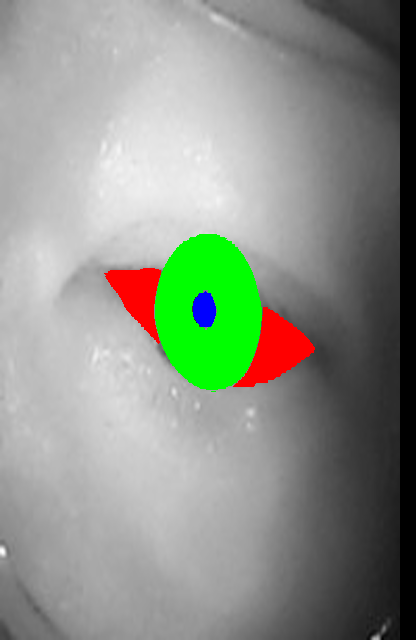

In [10]:
from PIL import Image

image = cv2.imread(image_path)
image = np.array(image)
image = np.pad(image, ((0,0),(0,16),(0,0)), 'constant', constant_values=0)

print(image.shape)

for i in range(640):
    for j in range(416):
        if n[i][j][0] == 1: # sclera, 공막, 적색
            image[i][j][0], image[i][j][1], image[i][j][2] = 255, 0, 0
        if n[i][j][1] == 1: # iris, 홍채, 녹색
            image[i][j][0], image[i][j][1], image[i][j][2] = 0, 255, 0
        if n[i][j][2] == 1: # pupil, 동공, 청색
            image[i][j][0], image[i][j][1], image[i][j][2] = 0, 0, 255

image = Image.fromarray(image)
image.show()

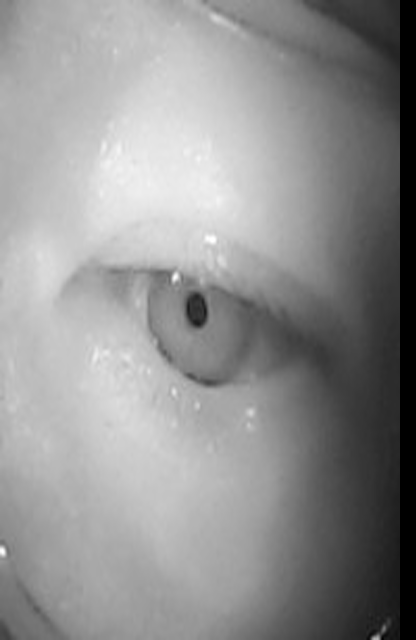

In [11]:
image = cv2.imread(image_path)
image = np.array(image)
image = np.pad(image, ((0,0),(0,16),(0,0)), 'constant', constant_values=0)
image = Image.fromarray(image)
image.show()